In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv('meets.csv')
df.head()

,MeetID,MeetPath,Federation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,0,365strong/1601,365Strong,2016-10-29,USA,NC,Charlotte,2016 Junior & Senior National Powerlifting Cha...
1,1,365strong/1602,365Strong,2016-11-19,USA,MO,Ozark,Thanksgiving Powerlifting Classic
2,2,365strong/1603,365Strong,2016-07-09,USA,NC,Charlotte,Charlotte Europa Games
3,3,365strong/1604,365Strong,2016-06-11,USA,SC,Rock Hill,Carolina Cup Push Pull Challenge
4,4,365strong/1605,365Strong,2016-04-10,USA,SC,Rock Hill,Eastern USA Challenge


In [35]:
df = df.replace('%', '', regex=True)
df = df.replace(',', '', regex=True)
df = df.replace('-', '', regex=True)
df = df.replace('', np.nan)
df = df.replace('MAY90', np.nan)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8482 entries, 0 to 8481
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MeetID       8482 non-null   int64 
 1   MeetPath     8482 non-null   object
 2   Federation   8482 non-null   object
 3   Date         8482 non-null   object
 4   MeetCountry  8482 non-null   object
 5   MeetState    5496 non-null   object
 6   MeetTown     6973 non-null   object
 7   MeetName     8482 non-null   object
dtypes: int64(1), object(7)
memory usage: 530.3+ KB


In [18]:
df.isnull().sum()

,0
MeetID,0
MeetPath,0
Federation,0
Date,0
MeetCountry,0
MeetState,2986
MeetTown,1509
MeetName,0


In [20]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

df[['Date', 'Year', 'Month']].head()

,Date,Year,Month
0,2016-10-29,2016,10
1,2016-11-19,2016,11
2,2016-07-09,2016,7
3,2016-06-11,2016,6
4,2016-04-10,2016,4


In [21]:
print('Total de federações:', df['Federation'].nunique())
print('Total de países:', df['MeetCountry'].nunique())
df['Federation'].value_counts().head(10)

Total de federações: 60
Total de países: 45


,count
Federation,
NSF,2517
USAPL,976
CPU,969
USPA,864
THSPA,670
PA,493
SPF,480
RPS,334
NZPF,179


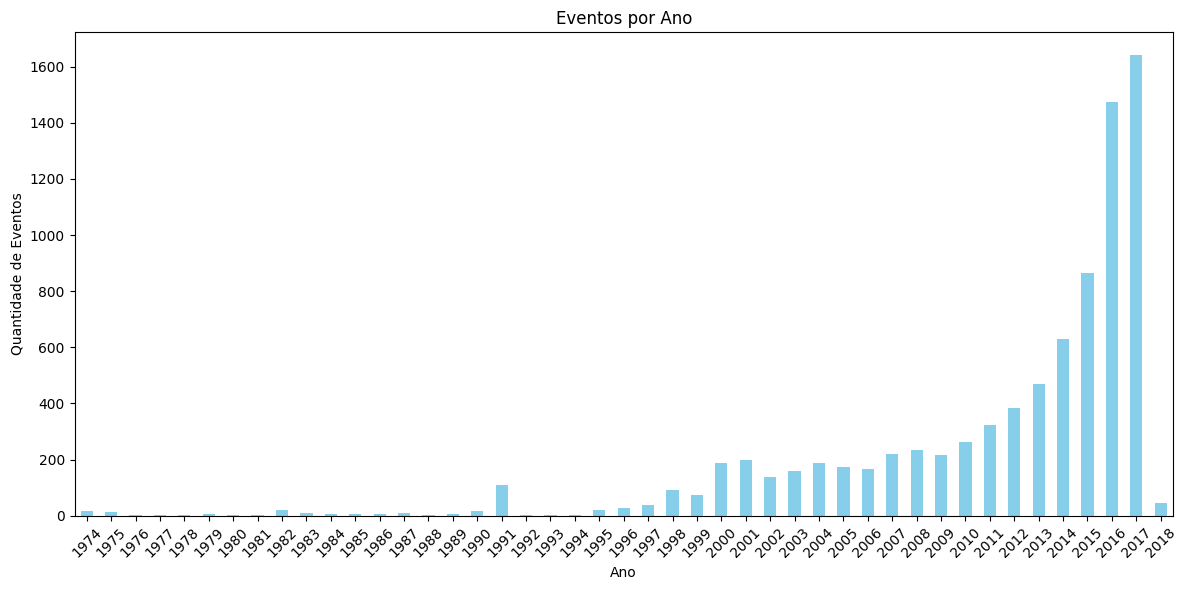

In [24]:
plt.figure(figsize=(12,6))
df['Year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Eventos por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Eventos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

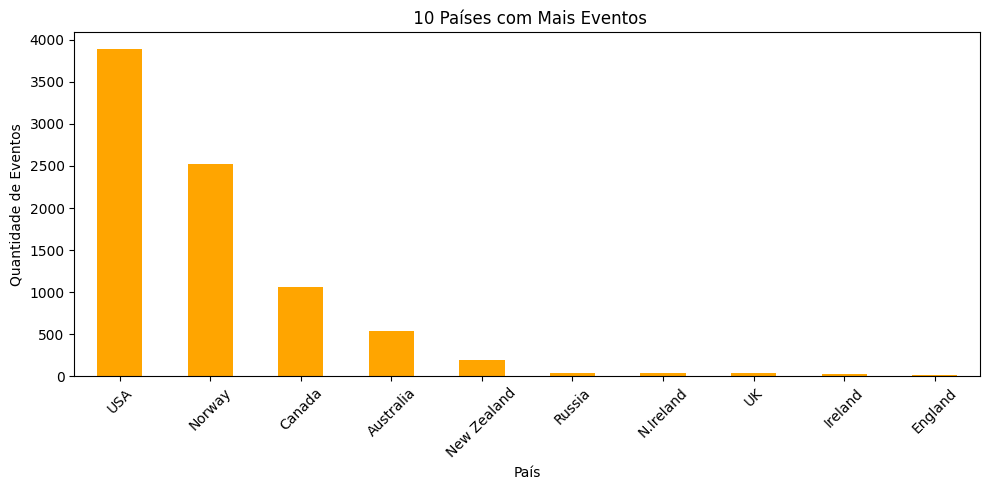

In [30]:
plt.figure(figsize=(10,5))
df['MeetCountry'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title(' 10 Países com Mais Eventos')
plt.xlabel('País')
plt.ylabel('Quantidade de Eventos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

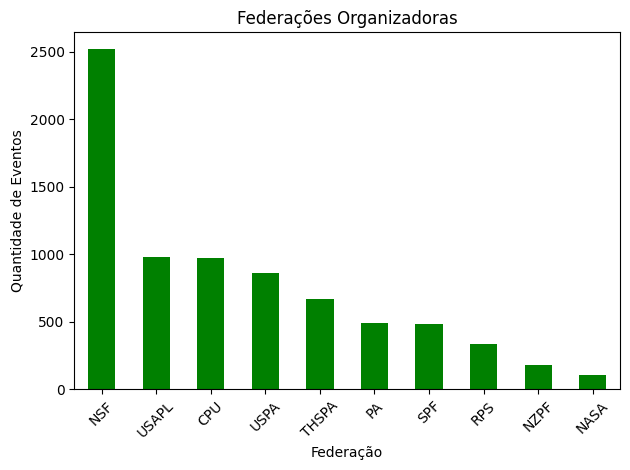

In [29]:
df['Federation'].value_counts().head(10).plot(kind='bar', color='green')
plt.title('Federações Organizadoras')
plt.xlabel('Federação')
plt.ylabel('Quantidade de Eventos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

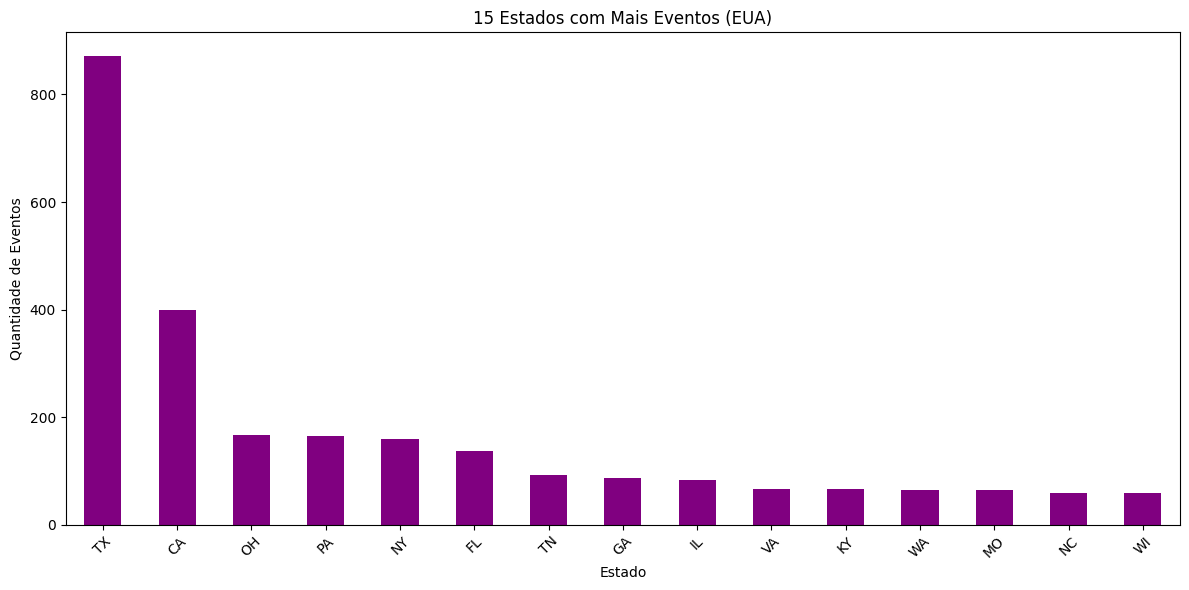

In [28]:
plt.figure(figsize=(12,6))
df[df['MeetCountry'] == 'USA']['MeetState'].value_counts().head(15).plot(kind='bar', color='purple')
plt.title('15 Estados com Mais Eventos (EUA)')
plt.xlabel('Estado')
plt.ylabel('Quantidade de Eventos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

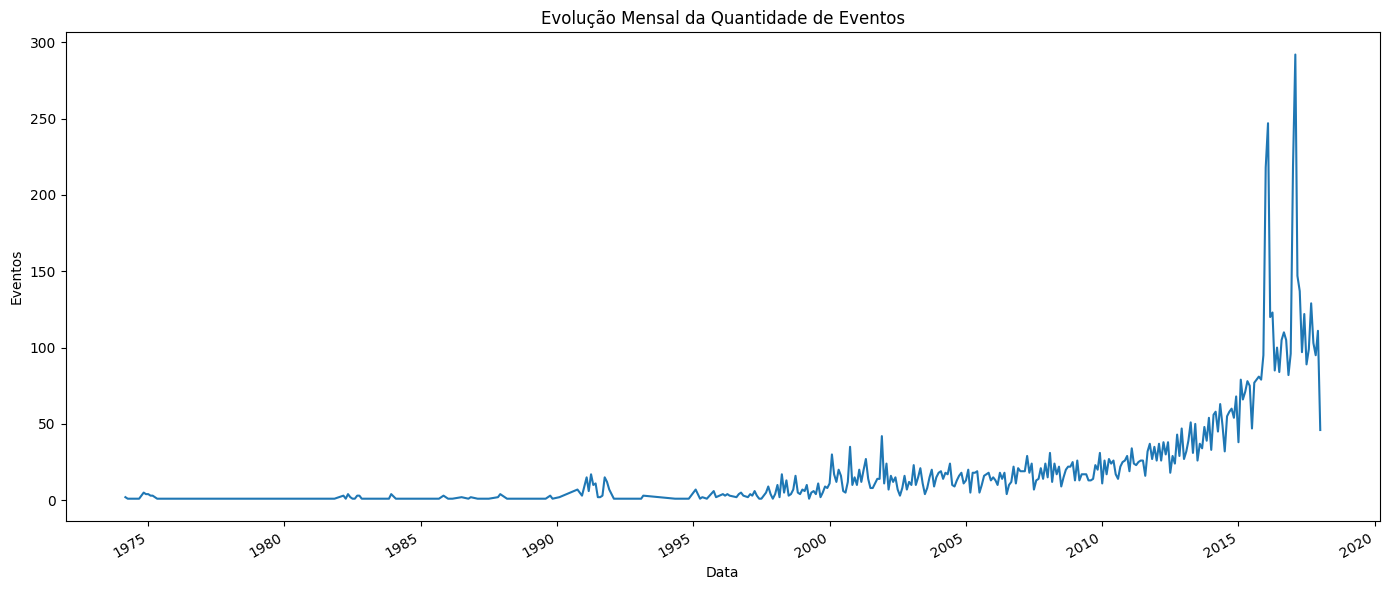

In [31]:
monthly = df.groupby(df['Date'].dt.to_period('M')).size()
monthly.index = monthly.index.to_timestamp()
plt.figure(figsize=(14,6))
monthly.plot()
plt.title('Evolução Mensal da Quantidade de Eventos')
plt.xlabel('Data')
plt.ylabel('Eventos')
plt.tight_layout()
plt.show()